In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
train_set=pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv')
test_set=pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv')
sample_solution=pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv')

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [5]:
train_set.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [6]:
# spliting the flight column
train_set[['flight_c','flight_n']]=train_set['flight'].str.split('-',expand=True)
test_set[['flight_c','flight_n']]=test_set['flight'].str.split('-',expand=True)

# changing the type of flight_n column  
train_set['flight_n']=train_set['flight_n'].astype(dtype=np.int64)
test_set['flight_n']=test_set['flight_n'].astype(dtype=np.int64)


In [7]:
# we drop id and flight columns
train_set.drop(columns=['id','flight'],inplace=True)
test_set.drop(columns=['id','flight'],inplace=True)

In [8]:
# the number of unique values
train_set.nunique()

airline                6
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             404
days_left             49
price               4420
flight_c               6
flight_n            1058
dtype: int64

**Visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

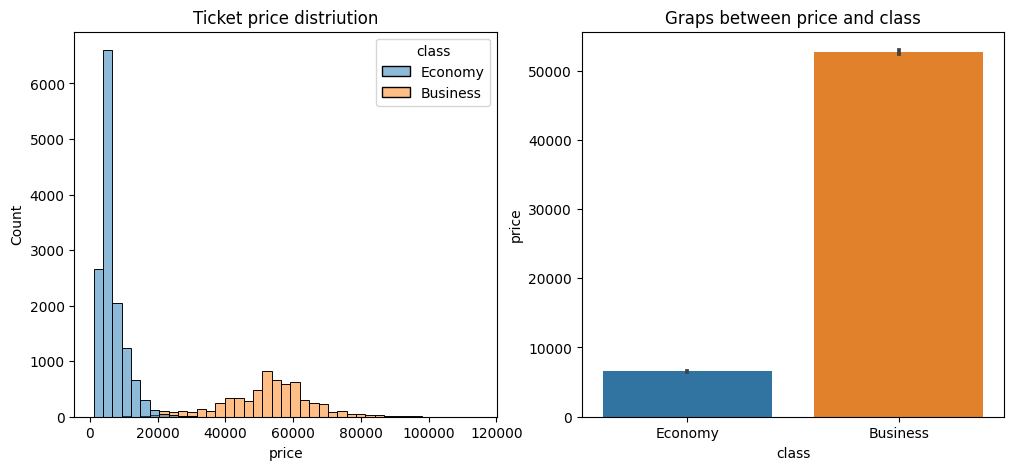

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(train_set,x=train_set['price'],hue=train_set['class'],ax=ax[0])
sns.barplot(data=train_set,x=train_set['class'],y=train_set['price'],ax=ax[1])
ax[0].set_title('Ticket price distriution')
ax[1].set_title('Graps between price and class')
plt.show()

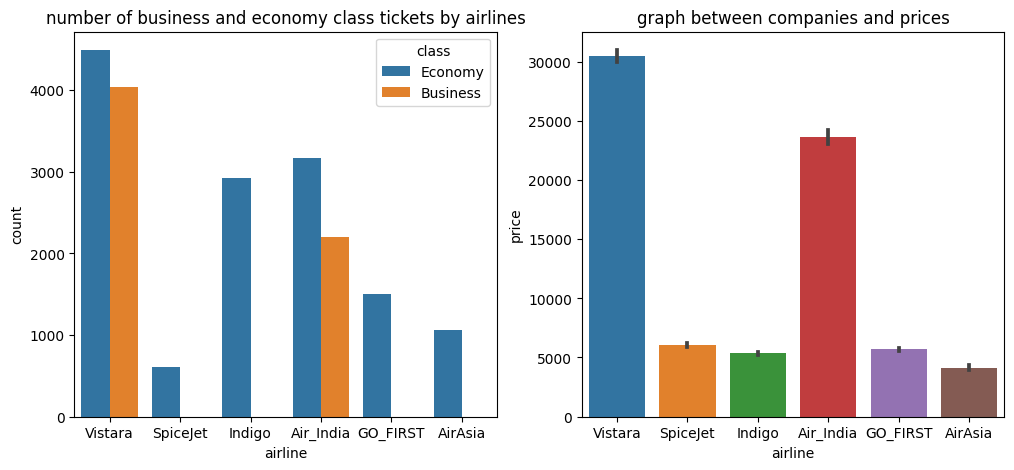

In [10]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=train_set,x=train_set['airline'],hue=train_set['class'],ax=ax[0])
sns.barplot(data=train_set,x=train_set['airline'],y=train_set['price'],ax=ax[1])
ax[0].set_title('number of business and economy class tickets by airlines')
ax[1].set_title('graph between companies and prices')
plt.show()



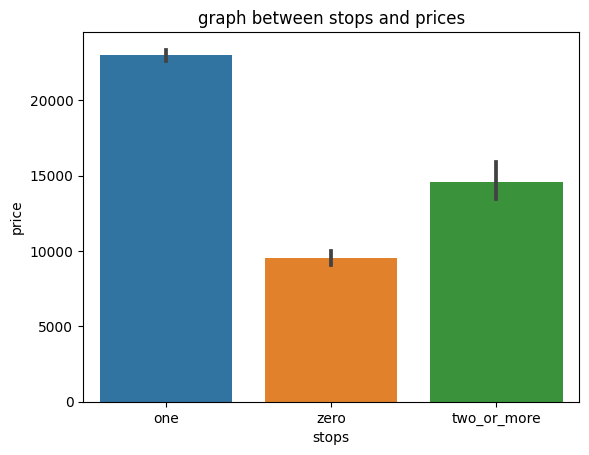

In [11]:
sns.barplot(data=train_set,x=train_set['stops'],y=train_set['price'])
plt.title('graph between stops and prices')
plt.show()

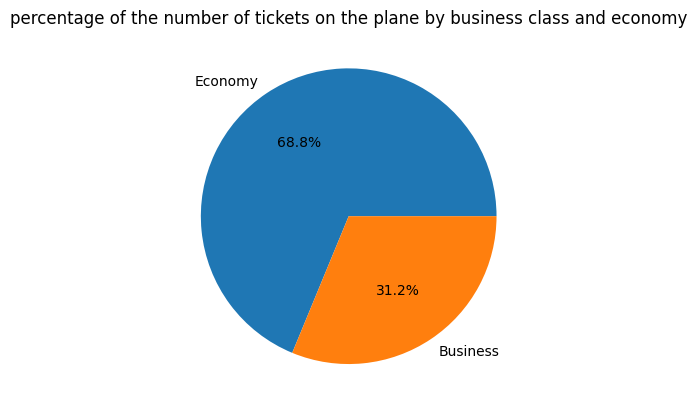

In [12]:
#percentage of the number of tickets on the plane by business class and economy

plt.pie(train_set[['class']].value_counts(),labels=['Economy','Business'],autopct='%1.1f%%')
plt.title('percentage of the number of tickets on the plane by business class and economy')
plt.show()

In [13]:
# Let's split train_set into x and y
x=train_set.drop('price',axis=1)
y=train_set[['price']]

In [14]:
# convert categorical values to numbers
x=pd.get_dummies(x)
test_set=pd.get_dummies(test_set)

In [15]:
# Modeling
model=RandomForestRegressor()
model.fit(x,y)

/tmp/ipykernel_18/1773296064.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


RandomForestRegressor()

In [16]:
# Let's predict test_set
prediction=model.predict(test_set)

In [17]:

print(mean_absolute_error(y.take(np.random.permutation(5000)),prediction))
print(np.sqrt(mean_squared_error(y.take(np.random.permutation(5000)),prediction)))

22925.3530031
32087.017072623574


In [18]:
sample_solution.head(1)

,id,price
0,1,0


In [19]:
sub=pd.DataFrame({'id':sample_solution.id,'price':prediction})
sub.head()

,id,price
0,1,55164.04
1,2,62788.47
2,3,23469.80
3,4,2440.09
4,5,5642.64


In [20]:
sub.to_csv('solutionn',index=False)

In [21]:
sub.head()

,id,price
0,1,55164.04
1,2,62788.47
2,3,23469.80
3,4,2440.09
4,5,5642.64
